In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Интегрирование

На этом уроке поговорим о интегрировании и его связи с дифференцированием. Обсудим определение интеграла, концепцию дифференциала и узнаем, как считать интегралы с помощью основной теоремы математического анализа.

## Вычисление площади под графиком функции
Исторически так сложилось, что концепция интеграла была связана с решением важной геометрической задачи: нахождением площади фигуры, которая была ограничена сверху функцией $f(x)$, снизу осью $x$ и справа и слева, вертикальными линиями, проходящими соответственно через точки  $x=a$ и $x=b$.

Для примера, рассмотрим функцию $f(x) = \mathrm{e}^x$ между $a = 0$ и $b = 2$. 
Площадь под графиком функции отобразим с помощью библиотеки matplotlib:


In [2]:
def plot_area(x_range, f, label = ""):
    plt.plot(x_range, f(x_range), label = label)
    # Закрасить график между значениями по Y
    plt.fill_between(x_range, 0, f(x_range), alpha = 0.25)
    plt.title("Площадь под графиком функции")

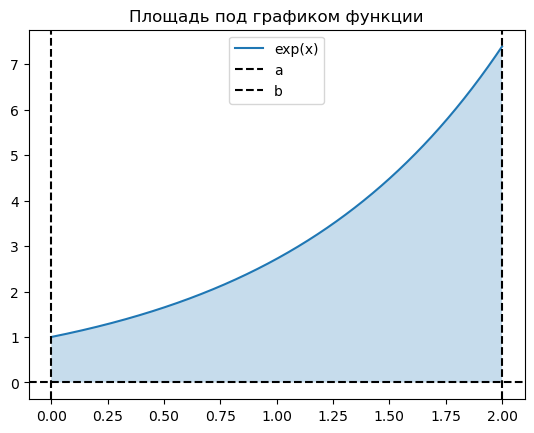

In [3]:
a, b = 0, 2
x_range = np.linspace(a, b, 1000)
f = lambda x: np.exp(x)
plot_area(x_range, f, "exp(x)")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best");

Можно определить значение интеграла функции $f(x)$ на отрезке от $a$ до $b$ как площадь закрашенной области:

$$
\displaystyle\int_a^b f(x) dx = \text{Площадь под графиком функции f(x)}
$$

Как можно определить интеграл, используя формулы?

В элементарной геометрии, мы часто находим площадь сложной фигуры, с помощью разделения ее на большое количество непересекающихся областей, площади которых мы можем легко посчитать. Обычно, невозможно разделить область под графиком функции на такие простые фигуры как, например, прямоугольник. Но можно использовать прямоугольник для того, чтобы высчитать эту площадь с некоторым приближением. Это значит, что можно разделить интервал между $a$ и $b$ на $N$ непересекающихся $\Delta x$ сегментов и приблизительно посчитать площадь под графиком функции, как сумму площадей прямоугольников, со сторонами равными $\Delta x$ и $f(x_n)$, где $x_n$ крайняя левая координата $n$-го сегмента на оси $x$ .


In [4]:
x_range

array([0.        , 0.002002  , 0.004004  , 0.00600601, 0.00800801,
       0.01001001, 0.01201201, 0.01401401, 0.01601602, 0.01801802,
       0.02002002, 0.02202202, 0.02402402, 0.02602603, 0.02802803,
       0.03003003, 0.03203203, 0.03403403, 0.03603604, 0.03803804,
       0.04004004, 0.04204204, 0.04404404, 0.04604605, 0.04804805,
       0.05005005, 0.05205205, 0.05405405, 0.05605606, 0.05805806,
       0.06006006, 0.06206206, 0.06406406, 0.06606607, 0.06806807,
       0.07007007, 0.07207207, 0.07407407, 0.07607608, 0.07807808,
       0.08008008, 0.08208208, 0.08408408, 0.08608609, 0.08808809,
       0.09009009, 0.09209209, 0.09409409, 0.0960961 , 0.0980981 ,
       0.1001001 , 0.1021021 , 0.1041041 , 0.10610611, 0.10810811,
       0.11011011, 0.11211211, 0.11411411, 0.11611612, 0.11811812,
       0.12012012, 0.12212212, 0.12412412, 0.12612613, 0.12812813,
       0.13013013, 0.13213213, 0.13413413, 0.13613614, 0.13813814,
       0.14014014, 0.14214214, 0.14414414, 0.14614615, 0.14814

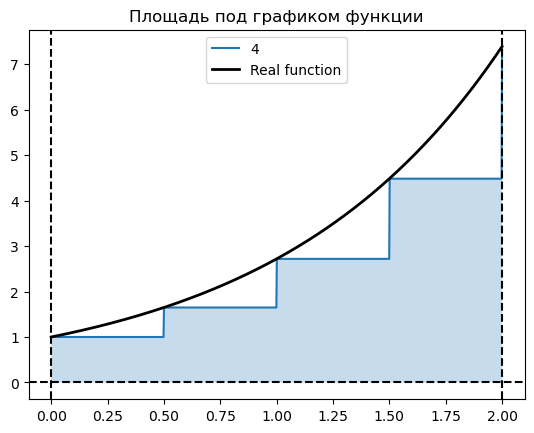

In [5]:
fN = lambda x, N = 2: f(np.floor(x * N) / N)
plot_area(x_range, fN, label=str(4))
plt.plot(x_range, f(x_range), c="k", lw=2, label = "Real function")
plt.legend(loc="best")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k");

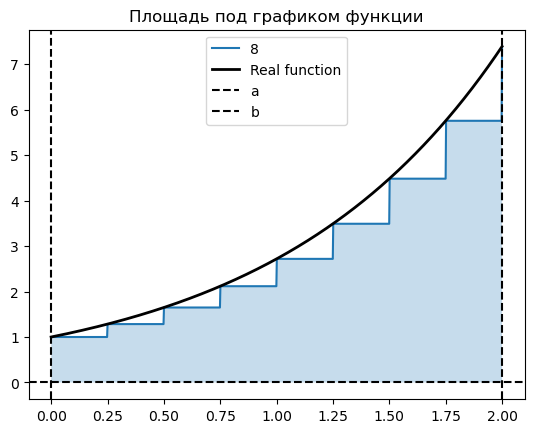

In [6]:
fN = lambda x, N = 4: f(np.floor(x * N) / N)
plot_area(x_range, fN, label=str(8))
plt.plot(x_range, f(x_range), c="k", lw=2, label = "Real function")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best")

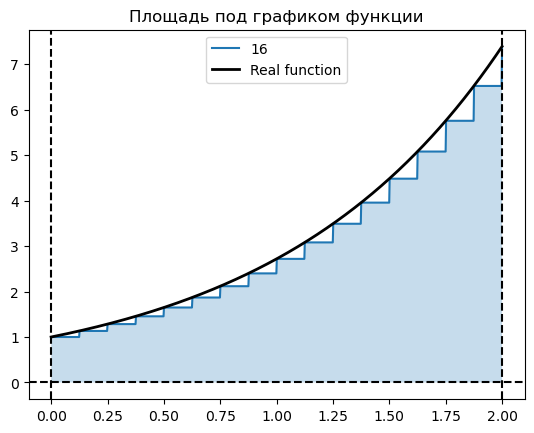

In [8]:
fN = lambda x, N = 8: f(np.floor(x*N)/N)
plot_area(x_range, fN, label=str(16))
plt.plot(x_range, f(x_range), c="k", lw=2, label = "Real function")
plt.legend(loc="best")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")

Можно выразить эту примерную площадь как сумму площадей:

$$
\displaystyle\sum_{n=0}^{N-1} \text{Площадь $n$-го прямоугольника} = \displaystyle\sum^{N-1}_{n=0} f(x_n) \Delta x
$$
где $\Delta x = \dfrac{b - a}{N}$ - это длина одной из сторон каждого прямоугольника и $x_n = n \Delta x$ - это левая координата $n$-го интервала на оси $x$.

Можно заметить, что значение площади, полученной с помощью прямоугольников становится все точнее и точнее, по мере того, как количество прямоугольников увеличивается, т.е значение $\Delta x$ все уменьшается и уменьшается.
Следовательно, можно сказать, что правильным определением для этой площади под графиком будет предел суммы площадей $N$ прямоугольников, при $N$ стремящегося к бесконечности:

$$
\displaystyle\int_a^b f(x) dx = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum^{N-1}_{n=0} f(x_n) \Delta x_{n} = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum^{N-1}_{n=0} f(x_n) \left(x_{n+1} - x_{n} \right)
$$

На графике можно увидеть, что значения этой аппроксимированной области быстро сходятся к значению интеграла. 

In [9]:
## a = 0, b = 2
def integral(a, b, func, N):
    x_range = np.linspace(a, b, N)
    dx = (b - a) / N
    return np.sum(func(x_range) * dx)

In [10]:
# Получили значение по формуле F(b) - F(a)
np.exp(b) - np.exp(a)

np.float64(6.38905609893065)

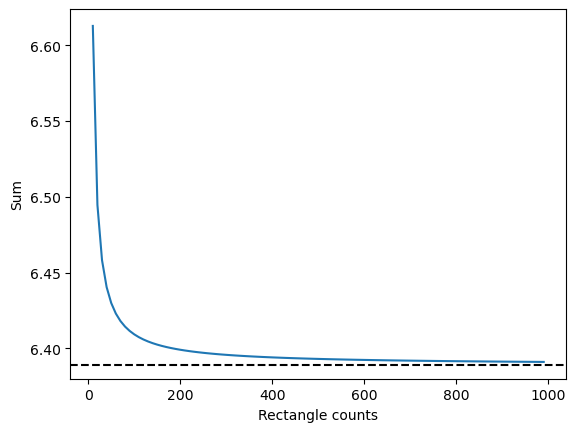

In [14]:
N_range = range(10, 1000, 10)
plt.plot(N_range, [integral(a, b, lambda x: np.exp(x), N) for N in N_range])
plt.xlabel("Rectangle counts")
plt.ylabel("Sum")
plt.axhline(6.38905609893065, c = "k", ls="--");

In [17]:
import sympy as sp
sp.var('x')
sp.integrate(sp.exp(x), (x, 0, 2)).evalf()

6.38905609893065

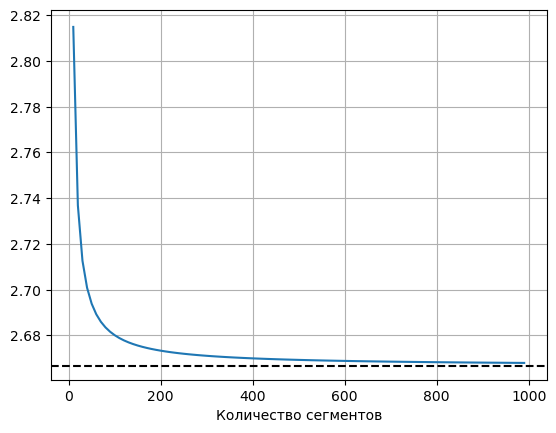

In [18]:
N_range = range(10, 1000, 10)
plt.plot(N_range, [integral(a, b, lambda x: x ** 2, N) for N in N_range])
plt.axhline(b **3 / 3 - a ** 3 / 3, c = "k", ls="--")
plt.xlabel("Количество сегментов")
plt.grid();

In [19]:
sp.integrate(x ** 2, (x, 0, 2)).evalf()

2.66666666666667

## Важные свойства интегралов

Есть несколько важных свойств интегралов. Начнем с суммы интегралов.  
Интеграл суммы двух функций $f(x)$ и $g(x)$ равен сумме итегралов:

$$
\displaystyle\int_a^b (f(x) + g(x))dx = \displaystyle\int_a^b f(x) dx + \displaystyle\int_a^b g(x) dx
$$

Константа $c$ может быть вынесена за знак интеграла:

$$
\displaystyle\int_a^b (c \cdot f(x))dx = c \displaystyle\int_a^b f(x) dx
$$

Также мы может представить интеграл как сумму интегралов, если возьмем какую то точке внутри интервала.
Например, рассмотрим три точки $a < b < c$. Интеграл функции $f(x)$ между точками $a$ и $c$ можно представить так:

$$
\displaystyle\int_a^c f(x) dx = \displaystyle\int_a^b f(x) dx + \displaystyle\int_b^c f(x) dx
$$

Это свойство можно увидеть на следующем графике:

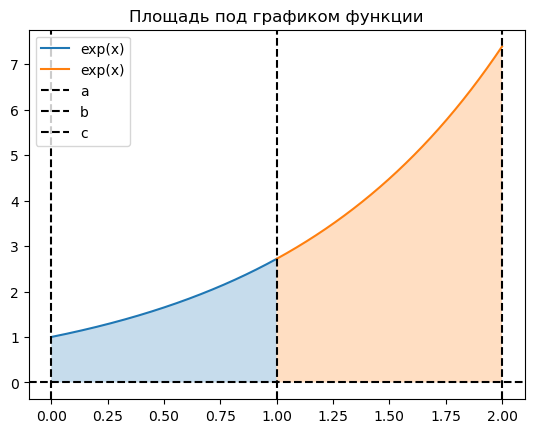

In [20]:
a, b, c = 0, 1, 2
x_range1 = np.linspace(a,b,1000)
x_range2 = np.linspace(b,c,1000)
f = lambda x: np.exp(x)
plot_area(x_range1, f, "exp(x)")
plot_area(x_range2, f, "exp(x)")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axvline(c, label="c", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best");

Также, по определению, интеграл между $b$ и $a$, где $b > a$ равен отрицательному интегралу между $a$ и $b$:

$$
\displaystyle\int_b^a f(x) dx = -\displaystyle\int_a^b f(x) dx
$$

Рассмотрим функцию  $f_{-}(x)$, которая принимает только отрицательные значения. Тогда интеграл функции $f_{-}(x)$ - это область над графиком функции $f(x)$ и осью $x$:

$$
\displaystyle\int_b^a f_{-}(x) dx = -1 \times \text{Площадь закрашенной области}
$$

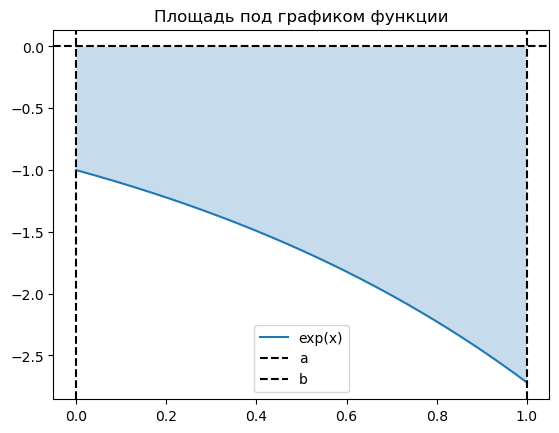

In [21]:
a, b = 0, 1
x_range1 = np.linspace(a,b,1000)
f = lambda x: -np.exp(x)
plot_area(x_range1, f, "exp(x)")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best")

Следовательно, интегралы могут принимать как положительные, так и отрицательные значения. Интеграл может быть равен нулю, если отрицательная часть будет равна положительной. Например:


$$
\displaystyle\int_{-\pi}^{\pi} \sin(x) dx = 0
$$


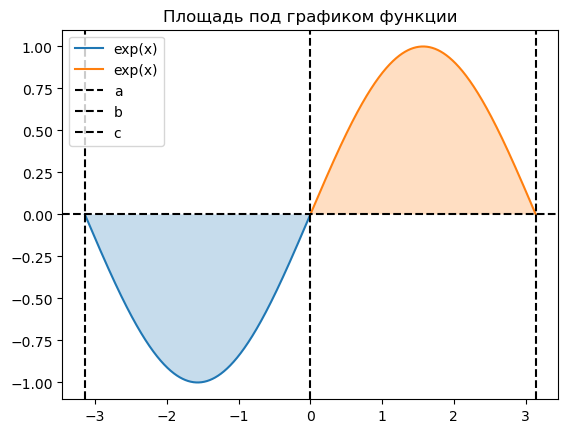

In [22]:
a = -np.pi
b = 0
c = np.pi
x_range1 = np.linspace(a,b,1000)
x_range2 = np.linspace(b,c,1000)
f = lambda x: np.sin(x)
plot_area(x_range1, f, "exp(x)")
plot_area(x_range2, f, "exp(x)")
plt.axvline(a, label="a", ls="--", color="k")
plt.axvline(b, label="b", ls="--", color="k")
plt.axvline(c, label="c", ls="--", color="k")
plt.axhline(0, ls="--", color="k")
plt.legend(loc="best");

## Сложное вычисление интегралов

Теперь, когда мы знаем, как определить интеграл, мы можем попытаться вычислить площадь с помощью некоторых простых функций. Вычислить интеграл, просто используя определение, - довольно сложная задача. Однако, это полезно. Есть несколько полезных инструментов для решения интегралов, которые сделают нашу жизнь намного проще, но о них поговорим попозже.

Рассмотрим следующий интеграл: 


$$
\displaystyle\int_0^b x^2 dx
$$


используя определение, мы можем написать, что:
$$
\displaystyle\int_0^b x^2 dx = \displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum^{N-1}_{n=0} x_n^2 \Delta x 
$$

где значение $\Delta x$ равно:

$$ 
\Delta x = \dfrac{b - 0}{N} = \dfrac{b}{N}
$$

и левая координата $n$-го сегмента на оси х:

$$ 
x_n = n \Delta x = \dfrac{n}{N} b 
$$

Используя эти формулы, можно переписать нашу сумму как:


$$ 
\displaystyle\sum^{N-1}_{n=0} x_n^2 \Delta x = \displaystyle\sum^{N-1}_{n=0} \dfrac{n^2}{N^3} b^3 = \dfrac{b^3}{N^3} \displaystyle\sum^{N-1}_{n=0} n^2 
$$

Теперь можно использовать хорошо известную формулу суммы $N$ первых квадратов:

$$ 
\displaystyle\sum^{N-1}_{n=0} n^2 = \dfrac{(N-1)N(2N -1)}{6} 
$$

Используя эту формулу, наша сумма превращается в:

$$ 
\displaystyle\sum^{N-1}_{n=0} x_n^2 \Delta x = b^3 \dfrac{(N-1)N(2N -1)}{6 N^3} = b^3 \dfrac{2N^3 -3 N^2 + 6}{6 N^3}
$$

В итоге, воспользуемся пределом для $N$, стремящегося к бесконечности


$$
\displaystyle\int_0^b x^2 dx = \displaystyle\lim_{N \rightarrow \infty} b^3 \dfrac{2N^3 -3 N^2 + 6}{6 N^3}= b^3 \displaystyle\lim_{N \rightarrow \infty} \dfrac{2N^3}{6 N^3} = \dfrac{1}{3} b^3 
$$

Итак, мы только что вывели, что:

$$
\displaystyle\int_0^b x^2 dx = \dfrac{1}{3} b^3 
$$

